# Introducción

El análisis de sentimientos y la detección de contenido agresivo en texto se ha
convertido en una tarea importante en la era digital, especialmente en plataformas
de redes sociales como Twitter. El modelado de datos desempeña un papel fundamental
en la identificación y clasificación automatizada de mensajes agresivos en textos,
lo cual resulta especialmente relevante en el contexto de los tweets en México.

Una de las técnicas más utilizadas en el campo del procesamiento de lenguaje natural
es el Support Vector Machine (SVM), un algoritmo de aprendizaje supervisado que
ha demostrado ser efectivo en la clasificación de textos. Al combinar SVM con el
enfoque de texto vectorizado utilizando la técnica TF-IDF (Term Frequency-Inverse
Document Frequency), es posible construir un modelo que capture las características
distintivas de los tweets y detecte la presencia de agresividad en ellos.

El proceso de modelado de datos para detectar agresividad en tweets en México
comienza con la recopilación y preprocesamiento de un conjunto de datos etiquetados
que contengan tweets clasificados como agresivos o no agresivos. Luego, se aplica
la técnica TF-IDF para convertir los textos en vectores numéricos, asignando pesos
a cada término según su frecuencia en el documento y su inversa en el conjunto de
datos.

A continuación, se entrena un modelo de Support Vector Machine utilizando los vectores
de características obtenidos con TF-IDF. El SVM busca encontrar una frontera de
decisión óptima que separe los tweets agresivos de los no agresivos en el espacio
vectorial. Durante el entrenamiento, el modelo ajusta los parámetros para maximizar
la precisión de la clasificación.

Una vez entrenado, el modelo de SVM se puede utilizar para predecir la agresividad
de nuevos tweets en función de sus características vectorizadas. Esto permite
clasificar automáticamente los textos según su nivel de agresividad, lo que resulta
útil para identificar contenido inapropiado, monitorear el comportamiento en línea
y tomar medidas adecuadas para garantizar un entorno digital seguro.

El modelado de datos utilizando Support Vector Machine con texto vectorizado mediante
TF-IDF ofrece una metodología efectiva para detectar la agresividad en tweets en
México. Esta técnica permite identificar automáticamente contenido agresivo en
textos, lo que facilita la supervisión y moderación en plataformas de redes sociales,
así como la adopción de medidas preventivas para fomentar un ambiente en línea
más seguro y respetuoso.

# Desarrollo

Retomando lo que se mecionó en la introducción, en este trabajo se utilizarán el
algoritmo de aprendizaje supervizado de Support Vector Machine (SVM) y el método
de vectorización TF-IDF para entrenar un modelo que clasifique tweets como agresivos
o no agresivos.

## Datos

Para llevar a cabo esta tarea se utilizaron dos conjuntos de datos:

* *Agressiveness Detection Train*: Conjunto de 5,132 tweets clasificados por personas
de forma binaria (1: agresivos, 0: no-agresivos).
* *Agressiveness Detection Predict*: Conjunto de 2,196 tweets no clasificados, los
cuales serán categorizados por el modelo entrenado.

Los datos de entrenamiento tienen la siguiente distribución:

| Categoría   |   Cuenta  | Porcentaje |
|:------------|----------:|-----------:|
| no agresivo |     3,655 |  71%       |
| agresivo    |     1,477 |  29%       |
| **total**   | **5,132** |  **100%**  |

## Proceso

El trabajo está desarrollado en Python y sigue el siguiente procedimiento:

1. Se comienza por declarar funciones que permitan el pre-procesamiento del texto
(remover: simbolos, acentos, caracteres consecutivos repetidos y *stopwords*; así
como hacer *stemming*, es decir, derivación de palabras).
2. Definir una función que permita importar los conjutnos de datos (en formato
*json*) para poderlos integrar en un *dataframe*.
3. Carga de datos
4. Vectorización de los tweets en ambos conjuntos de datos utilizando el método
TF-IDF con la librería *sklearn*
5. Entrenamiento del modelo (conjunto *train*) y predicción de datos (conjunto
*predict*)
6. Visualización de resultados

Cada uno de estos puntos está disponible en el Apéndice.

## Resultados

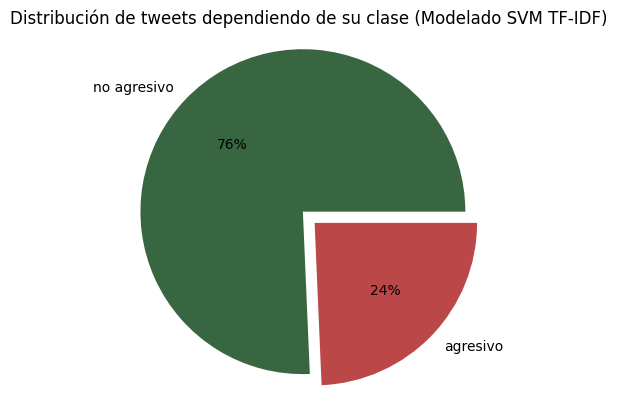

In [114]:
display.Image("./tweets_distribution.png")

Con base en la gráfica de pastel anterior, se puede observar que de los datos
sin clasificar, el 24% fueron categorizados como agresivos por el modelo. En términos
numéricos tendríamos los siguientes resultados exactamente:

| Categoría   |   Cuenta  |
|:------------|----------:|
| no agresivo |     1,662 |
| agresivo    |      534  |
| **total**   | **2,196** |

Podemos observar que, en términos de porcentaje, la distribución de los datos es
cercana al conjunto de entrenamiento.

Talvez pueda haber ciertas palabras que tengan más peso que otras al momento de
catalogar un tweet como agresivo o no agresivo. A continuación se muestran las
palabras (después de que el texto fue pre-procesado) más comunes para cada categoría.

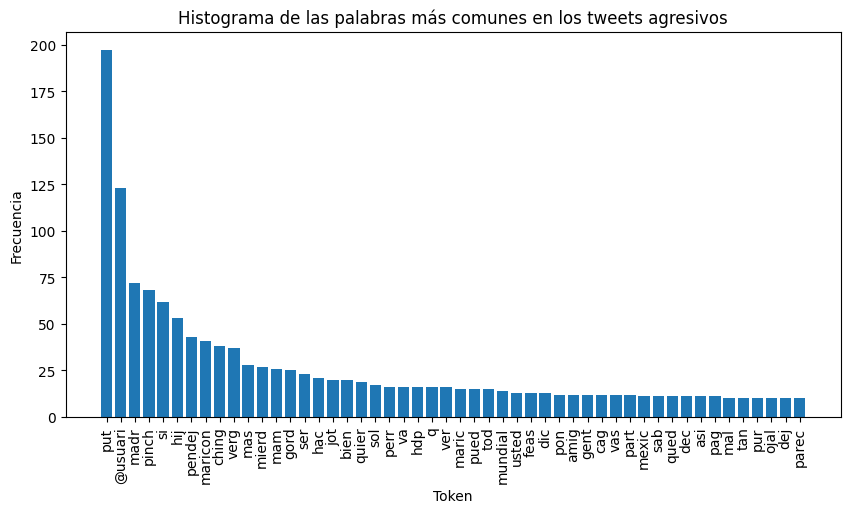

In [149]:
display.Image("./hist_agr.png")

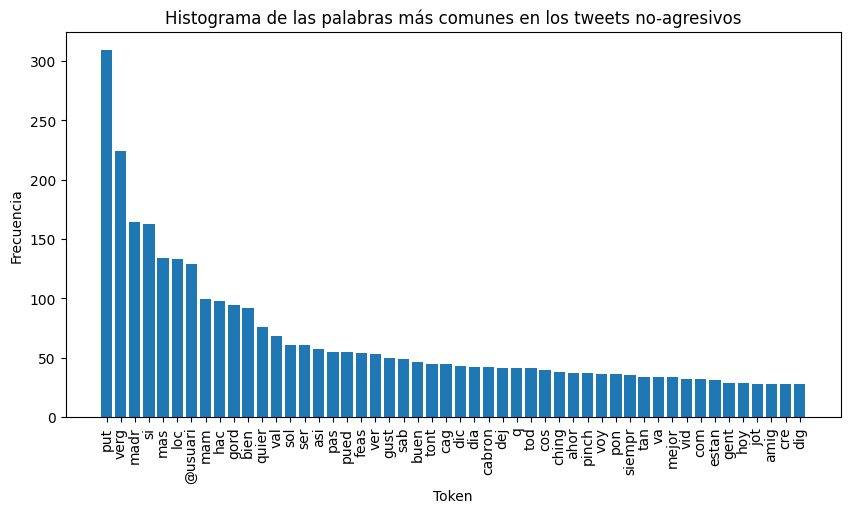

In [148]:
display.Image("./hist_no_agr.png")

En los histogramas se puede observar que muchas de las palabras aparecen en ambas
categorías, lo que indicaría que son palabras muy utilizadads pero que no son
importantes para determinar si un tweet es *agresivo* o *no agresivo*. A continuación
se presenta una tabla que muestra las posiciones (de acuedo con la frecuencia) de
las palabras en los tweets agresivos y en los no agresivos,
de esta forma se puede observar si alguna de las palabras de los tweets agresivos
no es tan frecuente en los tweets no agresivos y viceversa:

| Palabra |Posición Agr|Posición No Agr|
|:--------|-----------:|--------------:|
| put     |          1 |             1 |
| @usuari |          2 |             7 |
| madr    |          3 |             3 |
| pinch   |          4 |            35 |
| si      |          5 |             4 |
| hij     |          6 |            95 |
| pendej  |          7 |            97 |
| maricon |          8 |           898 |
| ching   |          9 |            33 |
| verg    |         10 |             2 |
| mas     |         11 |             5 |
| mierd   |         12 |           278 |
| mam     |         13 |             8 |
| gord    |         14 |            10 |
| ser     |         15 |            15 |

Se puede observar que, de las 15 palabras más repetidas en los tweets agresivos,
las que no se encuentran en las más frecuentes de los tweets no agresivos son:

* @usuario
* pinche
* hijo/a
* pendejo/a
* maricon
* chingar (conjugaciones)
* mierda

siendo "maricon" y "mierda" las palabras en las que más difiere la frecuencia entre
categorías.

Lo anterior provee información interesante:

1. Las palabras más agresivas para el modelo son las listadas previamente.
2. La palabra "pendejo", "mierda" y las expresiones "hijo de ..." o "chinga a tu
madre" son las que el modelo consideró como las más ofensivas solo después de
"maricón"
3. Aparentemente la palabra "maricón" es considerada la más agresiva por el modelo,
esto se puede inferir al ver que es una palabra muy frecuente en los tweets agresivos
pero una palabra poco frecuente en los tweets no agresivos.
4. Un tweet tiene mayor probabilidad de ser agresivo si hay un usuario arrobado.

# Conclusión

En este trabajo se utilizó el algoritmo de Support Vector Machine (SVM) para
categorizar tweets como agresivos o no agresivos. Se encontró que ciertas palabras
tienen un impacto significativo en la clasificación de los tweets como agresivos.
Estas palabras, al estar presentes en un tweet, aumentan la probabilidad de que
el modelo lo catalogue como agresivo.

Este hallazgo sugiere que existen términos específicos que pueden servir como
indicadores de contenido agresivo en los tweets. Identificar y comprender estas
palabras puede ser útil para monitorear y regular la conducta en las redes sociales.

Las aplicaciones de este ejercicio son diversas y tienen un potencial significativo
en la regulación de la conducta en las redes sociales. Por ejemplo, los resultados
podrían utilizarse para desarrollar sistemas de detección automática de contenido
agresivo, lo cual podría ayudar a moderar y filtrar el contenido inapropiado en
tiempo real. Esto podría contribuir a crear un entorno en línea más seguro y respetuoso.

Además, esta investigación puede ser útil para proveer orientación a los usuarios
de redes sociales sobre cómo evitar el lenguaje y comportamiento agresivo,
fomentando así interacciones más positivas y constructivas en línea.

# Apéndice

In [25]:
# Libraries
from IPython import display
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
import json
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC

## Definición de funciones

### Función para preprocesamiento de datos

In [26]:
# Get english stopwords
spanish_stopwords = stopwords.words('spanish')
symbols = list(set("«—;:,.\\-\"'/()[]¿?¡!{}~<>|\r_'\n'`"))

def remove_repeated_chars(string:str):
    '''
    Gets a string as input and returns it removing repeated consecutive
    characters, leving 2 at most

    Example:
        >> remove_repeated_chars('hellooo wooorlddddddd')
        helloo woorldd
    '''
    result = ""
    count = 0
    prev_char = None
    for char in string:
        if char == prev_char:
            count += 1
            if count <= 2:
                result += char
        else:
            count = 1
            result += char
            prev_char = char
    return result



def preprocess(input_str):
    '''
    Returns a given string in lower case, without symbols and accents. It also
    removes repeated consecutive characters and stopwords and does spanish
    stemming.

    Example:
        >> preprocess('Este restaurante me parece excepcionalmente delicioso')
        restaur parec excepcional delici
    '''

    # Convert to lower case
    input_str = input_str.lower()
    nfkd_form = unicodedata.normalize('NFKD', input_str)

    # Remove symbols, accents and numbers
    plain_text = ''.join([c for c in nfkd_form if not unicodedata.combining(c) \
                          and c not in symbols and not c.isnumeric()])

    # Remove repeated chars
    plain_text = remove_repeated_chars(plain_text)

    # Do stemming and remove stopwords
    stemmer = SnowballStemmer('spanish')
    return u' '.join([stemmer.stem(word) for word in plain_text.split() if word\
                      not in spanish_stopwords])

### Función para importar datos

In [27]:
def load_corpus(file_path:str):

    corp_dict = {'class':[],
                 'text':[],
                 'processed_text':[]}

    with open(file_path, 'r') as f:
        for line in f:
            data = json.loads(line)
            corp_dict['class'].append(data['klass'])
            corp_dict['text'].append(data['text'])
            corp_dict['processed_text'].append(preprocess(data['text']))

    return corp_dict

## Cargar datos

Se importan los siguientes datasets:

* *AgressivenessDetection_train*: Datos utilizados para entrenar el modelo, previamente
clasificados por un experto humano.
* *AgressivenessDetection_predict*: Datos no categorizados, los cuales se tratarán
de clasificar utilizando el modelo previamente entrenado.

In [28]:
# Load training data
train_df = pd.DataFrame(load_corpus('data/AggressivenessDetection_train.json'))
# Load uncategorized data
predict_df = pd.DataFrame(load_corpus('data/AggressivenessDetection_predict.json'))

## Vectorización TF-IDF

In [29]:
tfidfvec = TfidfVectorizer()

# Vectorize train sample
x_tfidf = tfidfvec.fit_transform(train_df['processed_text'])
# Vectorize test sample
predict_vec = tfidfvec.transform(predict_df['processed_text'])

## Algoritmo clasificador SVM

Entrenamiento del modelo Support Vector Machine lineal utilizando los datos de
entrenamiento.

In [30]:
svc = LinearSVC(random_state=0, max_iter=3000)
svc.fit(x_tfidf, train_df['class'])

LinearSVC(max_iter=3000, random_state=0)

In [31]:
svm_predict = svc.predict(predict_vec)
#np.unique(svm_predict, return_counts=True)
predict_df['svm_tfidf'] = svm_predict

## Visualización de datos

In [33]:
def set_label(value):
    if value == 1:
        return 'agresivo'
    elif value == 0:
        return 'no agresivo'
    else:
        return 'otro'

predict_df['class'] = predict_df['svm_tfidf'].apply(set_label)

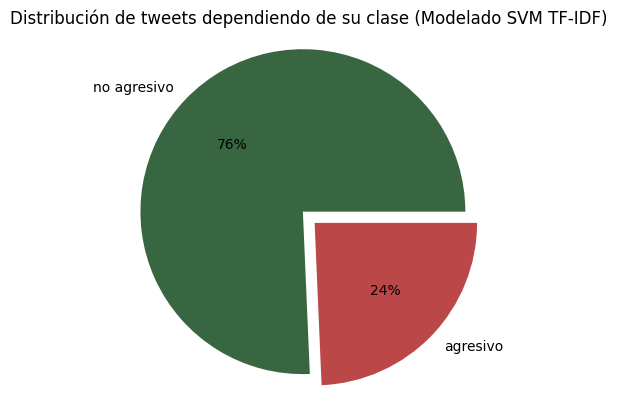

In [74]:
import matplotlib.pyplot as plt

# Get count of the 'class' column
label_counts = predict_df['class'].value_counts()

# Get values, labels and colors for pie chart
values = label_counts.values
labels = label_counts.index
colors = ['#386641', '#bc4749']

# Set the separation value for each category of the plot
separation = [0.05] * len(labels)

# Crear gráfico de pie con separación entre las partes
plt.pie(values, labels=labels, colors = colors,autopct='%1.0f%%', explode=separation)

# Adjust axis
plt.axis('equal')

# Add title
plt.title('Distribución de tweets dependiendo de su clase (Modelado SVM TF-IDF)')

# Show graph
plt.show()

In [77]:
# Get counts for class column
label_counts = predict_df['class'].value_counts()
# Add total at the end of the class counts
label_counts = pd.concat([label_counts, pd.Series({'total':label_counts.sum()})])
# Print table for markdown
print(label_counts.to_frame().reset_index().\
      rename(columns={'index': 'Categoría', 0: 'Cuenta'}).\
        to_markdown(index=False))

| Categoría   |   Cuenta |
|:------------|---------:|
| no agresivo |     1662 |
| agresivo    |      534 |
| total       |     2196 |


In [116]:
# Do the same for the training set
train_df['categ'] = train_df['class'].apply(set_label)
# Get counts for class column
label_counts = train_df['categ'].value_counts()
# Add total at the end of the class counts
label_counts = pd.concat([label_counts, pd.Series({'total':label_counts.sum()})])
# Print table for markdown
print(label_counts.to_frame().reset_index().\
      rename(columns={'index': 'Categoría', 0: 'Cuenta'}).\
        to_markdown(index=False))

| Categoría   |   Cuenta |
|:------------|---------:|
| no agresivo |     3655 |
| agresivo    |     1477 |
| total       |     5132 |


In [97]:
from collections import Counter

non_agresive_tokens = ''.join(list(predict_df['processed_text'][predict_df['svm_tfidf'] == 0])).split()
non_agr_frequencies = Counter(non_agresive_tokens)
non_agr_frequencies = dict(sorted(non_agr_frequencies.items(), key=lambda x: x[1], reverse=True))

agresive_tokens = ''.join(list(predict_df['processed_text'][predict_df['svm_tfidf'] == 1])).split()
agr_frequencies = Counter(agresive_tokens)
agr_frequencies = dict(sorted(agr_frequencies.items(), key=lambda x: x[1], reverse=True))

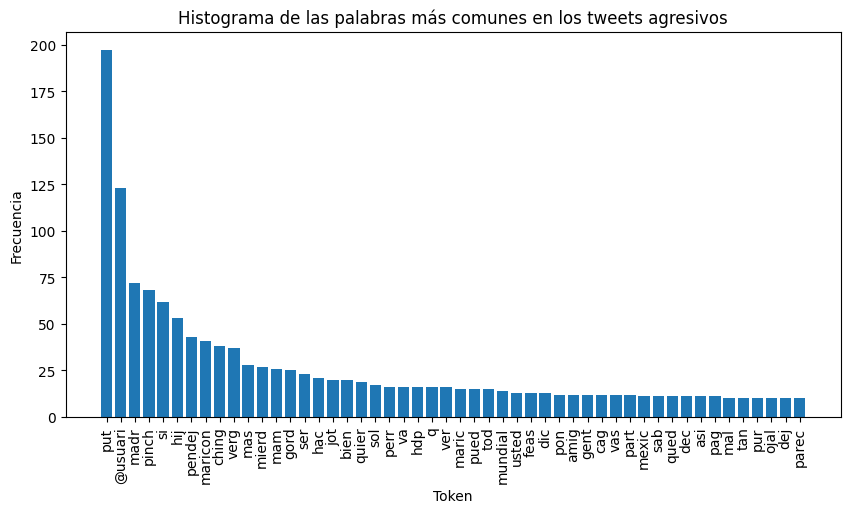

In [145]:
import matplotlib.pyplot as plt

# Get the keys and values up to 50
keys = list(agr_frequencies.keys())[:50]
values = list(agr_frequencies.values())[:50]

plt.figure(figsize=(10,5))

# Create a histogram
plt.bar(keys, values)

# Set x-axis labels vertically
plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Token')
plt.ylabel('Frecuencia')
plt.title('Histograma de las palabras más comunes en los tweets agresivos')

# Show the plot
plt.show()

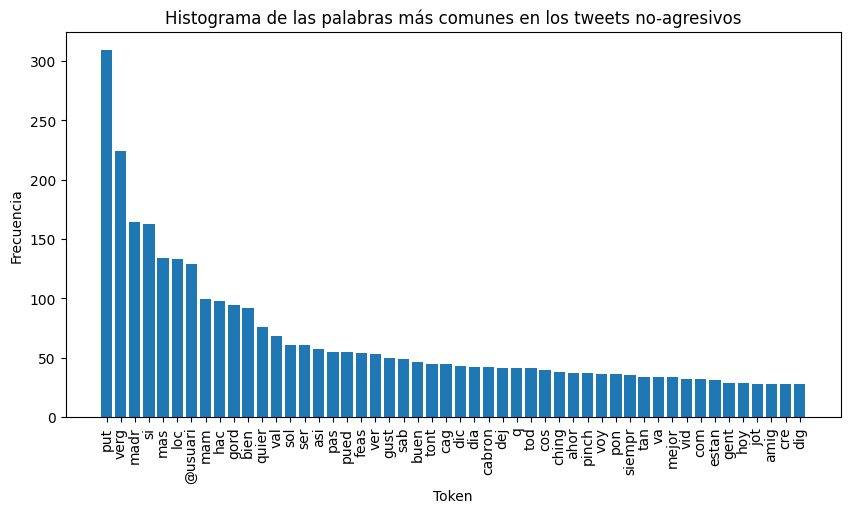

In [147]:
import matplotlib.pyplot as plt

# Get the keys and values up to 50
keys = list(non_agr_frequencies.keys())[:50]
values = list(non_agr_frequencies.values())[:50]

plt.figure(figsize=(10,5))

# Create a histogram
plt.bar(keys, values)

# Set x-axis labels vertically
plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Token')
plt.ylabel('Frecuencia')
plt.title('Histograma de las palabras más comunes en los tweets no-agresivos')

# Show the plot
plt.show()

In [138]:
keys = list(agr_frequencies.keys())[:15]
non_agr_order = [list(non_agr_frequencies.keys()).index(word) + 1 for word in keys]
tops = pd.DataFrame({'words':keys, 'top agr':[i+1 for i in range(15)],\
                     'top non_agr':non_agr_order})

print(tops.to_markdown(index=False))

| words   |   top agr |   top non_agr |
|:--------|----------:|--------------:|
| put     |         1 |             1 |
| @usuari |         2 |             7 |
| madr    |         3 |             3 |
| pinch   |         4 |            35 |
| si      |         5 |             4 |
| hij     |         6 |            95 |
| pendej  |         7 |            97 |
| maricon |         8 |           898 |
| ching   |         9 |            33 |
| verg    |        10 |             2 |
| mas     |        11 |             5 |
| mierd   |        12 |           278 |
| mam     |        13 |             8 |
| gord    |        14 |            10 |
| ser     |        15 |            15 |
